In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


In [2]:
class AgentState(TypedDict):
    num1: int
    operation1: str
    num2: int
    num3: int
    operation2: str
    num4: int
    final1: int
    final2: int

In [3]:
def add_node(state: AgentState) -> AgentState:
    state['final1'] = state['num1'] + state['num2']
    return state

def subtract_node(state: AgentState) -> AgentState:
    state['final1'] = state['num1'] - state['num2']
    return state

def add_node2(state: AgentState) -> AgentState:
    state['final2'] = state['num3'] + state['num4']
    return state

def subtract_node2(state: AgentState) -> AgentState:
    state['final2'] = state['num3'] - state['num4']
    return state

def decide_next_node1(state: AgentState) -> AgentState:
    if state['operation1'] == '+':
        return "addition_operation1"
    elif state['operation1'] == '-':
        return "subtraction_operation1"

def decide_next_node2(state: AgentState) -> AgentState:
    if state['operation2'] == '+':
        return "addition_operation2"
    elif state['operation2'] == '-':
        return "subtraction_operation2"


In [4]:
graph = StateGraph(AgentState)

graph.add_node("add_node", add_node)
graph.add_node("subtract_node", subtract_node)
graph.add_node("add_node2", add_node2)
graph.add_node("subtract_node2", subtract_node2)

graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state:state)

graph.add_conditional_edges(
    "router",
    decide_next_node1,
    {
        "addition_operation1": "add_node",
        "subtraction_operation1": "subtract_node",
    }
)

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "subtract_node2",
    }
)

graph.add_edge(START, "router")
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()



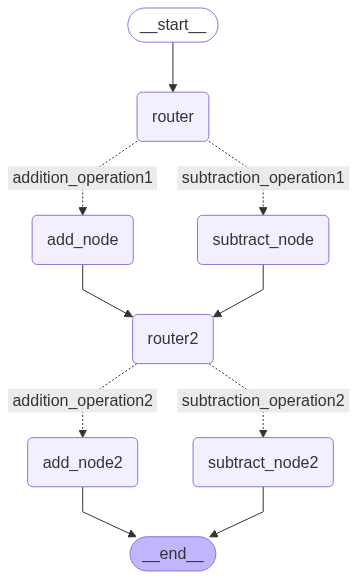

In [5]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
initial_state1 = AgentState(
    num1=5,
    operation1='+',
    num2=3,
    num3=10,
    operation2='-',
    num4=4,
    final1=0,
    final2=0
)
print(app.invoke(initial_state1))

{'num1': 5, 'operation1': '+', 'num2': 3, 'num3': 10, 'operation2': '-', 'num4': 4, 'final1': 8, 'final2': 6}
